In [1]:
import numpy as np
from scipy import stats
from statsmodels.stats import weightstats
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.set_option('max_rows', 5)
%matplotlib inline

## 対応のない2群の平均の差の検定
---
対応のない 2 群のデータ $X,Y$ で、それぞれの平均 $\overline{X},\overline{Y}$ の差に対して $t$ 検定を行う。

母集団分布が共に正規分布に従う、またはサンプルサイズが大きく $\overline{X},\overline{Y}$ のどちらにも[中心極限定理](../beginner/population_mean_estimation.ipynb#%E4%B8%AD%E5%BF%83%E6%A5%B5%E9%99%90%E5%AE%9A%E7%90%86-(central-limit-theorem))が成り立つような場合には、変数それぞれの平均の差に対して $t$ 検定を使用する。ただし、自由度の計算がこれまでと異なる。

<table class="border">
    <tr>
        <th class="border-bottom border-right-bold">対応のある 2 群</th>
        <td>「2 群の差」の平均に対して $t$ 検定</td>
    </tr>
    <tr>
        <th class="border-bottom border-right-bold">対応のない 2 群</th>
        <td>「2 群の平均」の差に対して $t$ 検定</td>
    </tr>
</table>

ここでは 2 標本について以下のように定義する。

<table class="border text-center">
    <tr class="background-dark">
        <th></th>
        <th>母平均</th>
        <th>母分散</th>
        <th>標本</th>
        <th>サンプルサイズ</th>
        <th>標本平均</th>
    </tr>
    <tr class="background-bright">
        <th class="border-bottom background-dark">母集団 $1$</th>
        <td>$\mu _{X}$</td>
        <td>$\sigma ^{2}_{X}$</td>
        <td>$X$</td>
        <td>$n_{X}$</td>
        <td style="min-width: 11em;">${\displaystyle \overline{X}\sim \mathcal{N}\left(\mu _{X},\ \frac
            {\sigma ^{2}_{X}}
            {n_{X}}
        \right)}$</td>
    </tr>
    <tr class="background-bright">
        <th class="border-bottom background-dark">母集団 $2$</th>
        <td>$\mu _{Y}$</td>
        <td>$\sigma ^{2}_{Y}$</td>
        <td>$Y$</td>
        <td>$n_{Y}$</td>
        <td style="min-width: 11em;">${\displaystyle \overline{Y}\sim \mathcal{N}\left(\mu _{Y},\ \frac
            {\sigma ^{2}_{Y}}
            {n_{Y}}
        \right)}$</td>
    </tr>
</table>

### 等分散の場合
---
2 群 $(X,Y)$ の分散が等しい $\sigma ^{2}_{X} =\sigma ^{2}_{Y}$ 場合、 2 群の平均の差 $D=\overline{X}-\overline{Y}$ の分散は $
\displaystyle \frac
    {\sigma ^{2}_{X}}
    {n_{X}}
+\frac
    {\sigma ^{2}_{Y}}
    {n_{Y}}
=\left(\frac
    {1}
    {n_{X}}
+\frac
    {1}
    {n_{Y}}
\right) \sigma ^{2}
$ であり、その推定量はそれぞれの不偏推定量の加重平均
$$
\begin{align}
    s^{2}_{D} & =\frac
        {( n_{X} -1) s_{X} +( n_{Y} -1) s_{Y}}
        {( n_{X} -1) +( n_{Y} -1)}\\
     & \\
     & =\frac
         {( n_{X} -1){\displaystyle \frac
             {{\displaystyle \sum ^{n_{X}}_{i=1}\left( X_{i} -\overline{X}\right) ^{2}}}
             {n_{X} -1}
         +( n_{Y} -1){\displaystyle \frac
             {{\displaystyle \sum ^{n_{Y}}_{i=1}\left( Y_{i} -\overline{Y}\right) ^{2}}}
             {n_{Y} -1}
         }}}
         {n_{X} +n_{Y} -2}\\
     & \\
     & =\frac
         {{\displaystyle \sum ^{n_{X}}_{i=1}\left( X_{i} -\overline{X}\right) ^{2}+\sum ^{n_{Y}}_{i=1}\left( Y_{i} -\overline{Y}\right) ^{2}}}
         {n_{X} +n_{Y} -2}
\end{align}
$$
で表される。 (プールした分散)

これらを用いて、以下の統計量 $t$ が自由度 $n_{X}+n_{Y}-2$ の $t$ 分布に従うことを利用して検定する。

$$
\begin{align}
    t & =\frac
        {\overline{D} -\mu _{D}}
        {\sqrt{
            \displaystyle \left(\frac
                {1}
                {n_{X}}
            +\frac
                {1}
                {n_{Y}}
            \right) s^{2}_{D}
        }}\\
     & \\
     & =\frac
         {\overline{X} -\overline{Y} -\mu _{D}}
         {s_{D}\sqrt{
             \displaystyle \left(\frac
                 {1}
                 {n_{X}}
             +\frac
                 {1}
                 {n_{Y}}
             \right)
         }}
\end{align}
$$



###### 練習問題
---
以下のデータセットの`A`グループと`B`グループの平均に差があるかを検定するための統計量 $t$ を求める。両グループの分散は等しいと仮定して良い。

In [2]:
np.random.seed(1234)
A = pd.DataFrame(
    dict(score=np.random.normal(50, 5, size=50), group=['A'] * 50), dtype=int)
B = pd.DataFrame(
    dict(score=np.random.normal(51, 5, size=40), group=['B'] * 40), dtype=int)
data = pd.concat([A, B]).sample(frac=1).reset_index(drop=True)
print('data')
display(data)

data


,score,group
0,47.072824,B
1,49.316026,A
...,...,...
88,48.986768,A
89,50.010592,A


In [3]:
A = data.query('group == "A"')['score']
B = data.query('group == "B"')['score']
na = A.count()
nb = B.count()
mua = A.mean()
mub = B.mean()
sd = np.sqrt((((A - mua)**2).sum() + ((B - mub)**2).sum()) / (na + nb - 2))
t = (mua - mub) / (sd * np.sqrt(1 / na + 1 / nb))
t

-0.8396879421853141

###### 練習問題

この検定に対応する帰無分布の確率密度関数と、上で求めた $t$ 統計量の位置をグラフ表示する。

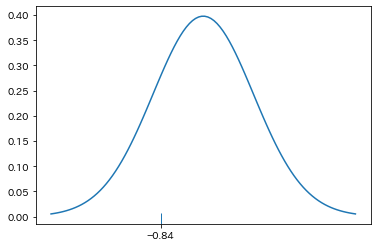

In [4]:
x = np.linspace(-3, 3, 100)
null_dist = stats.t(na+nb-2)
plt.plot(x, null_dist.pdf(x))
sns.rugplot([t])
plt.xticks([t])
plt.show()

###### 練習問題

上で求めた検定統計量 $𝑡$ に対応した $𝑝$ 値を求める。

In [5]:
p = null_dist.sf(np.abs(t)) * 2
p

0.4033588329742739

### 不等分散の場合
---
2 群の平均の差 $
\displaystyle D=\overline{X} -\overline{Y} \sim \mathcal{N}\left( \mu _{X} -\mu _{Y} ,\frac
    {\sigma ^{2}_{X}}
    {n_{X}}
+\frac
    {\sigma ^{2}_{Y}}
    {n_{Y}}
\right)
$ なので検定統計量 $t$ は

$$
\begin{align}
    t & =\frac
        {\left(\overline{X} -\overline{Y}\right) -( \mu _{X} -\mu _{Y})}
        {s_{D}}\\
     & \\
     & =\frac
         {\left(\overline{X} -\overline{Y}\right) -( \mu _{X} -\mu _{Y})}
         {\sqrt{
             \displaystyle \frac
                 {s^{2}_{X}}
                 {n_{X}}
             +\frac
                 {s^{2}_{Y}}
                 {n_{Y}}
         }}
\end{align}
$$

この $t$ は自由度 $
\displaystyle \nu =\frac
    {\left(\displaystyle \frac
        {s^{2}_{X}}
        {n_{X}}
    +\frac
        {s^{2}_{Y}}
        {n_{Y}}
    \right)^{2}}
    {\displaystyle \frac
        {1}
        {n_{X} -1}
    \left(\frac
        {s^{2}_{X}}
        {n_{X}}
    \right)^{2} +\frac
        {1}
        {n_{Y} -1}
    \left(\frac
        {s^{2}_{Y}}
        {n_{Y}}
    \right)^{2}}
$ の $t$ 分布に近似的に従うことがわかっているので、これを利用して検定する。 (ウェルチの $t$ 検定)

###### 練習問題

以下のデータセットの`A`グループと`B`グループの平均に差があるかを検定するための統計量 $t$ を求める。両グループの分散は等しくないものと仮定する。

In [6]:
print('data')
display(data)

data


,score,group
0,47.072824,B
1,49.316026,A
...,...,...
88,48.986768,A
89,50.010592,A


In [7]:
A = data.query('group == "A"')['score']
B = data.query('group == "B"')['score']
sx2 = A.var(ddof=1) / A.count()
sy2 = B.var(ddof=1) / B.count()
t = (A.mean() - B.mean()) / np.sqrt(sx2 + sy2)
t

-0.8270628321291595

###### 練習問題

この検定に対応する帰無分布の確率密度関数と、上で求めた $t$ 統計量の位置をグラフ表示する。

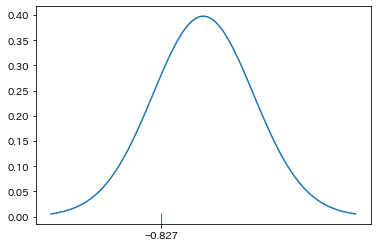

In [8]:
x = np.linspace(-3, 3, 100)
nu = (sx2 + sy2)**2 / (sx2**2 / (A.count() - 1) + sy2**2 / (B.count() - 1))
null_dist = stats.t(nu)
plt.plot(x, null_dist.pdf(x))
sns.rugplot([t])
plt.xticks([t])
plt.show()

###### 練習問題

上で求めた検定統計量 $𝑡$ に対応した $𝑝$ 値を求める。

In [9]:
p = null_dist.sf(np.abs(t)) * 2
p

0.4107247758044176

## Pythonでの対応のない2群の平均の差の検定の実行方法
---

### 等分散の場合
---
`scipy.stats.ttest_ind`または`statsmodels.stats.weightstats.ttest_ind`を使用する。

In [10]:
stats.ttest_ind??

In [11]:
stats.ttest_ind(
    data.query('group == "A"')['score'],
    data.query('group == "B"')['score'])

Ttest_indResult(statistic=-0.8396879421853143, pvalue=0.4033588329742739)

In [12]:
weightstats.ttest_ind??

In [13]:
weightstats.ttest_ind(
    data.query('group == "A"')['score'],
    data.query('group == "B"')['score'])

(-0.8396879421853077, 0.40335883297427755, 88.0)

### 不等分散の場合
---
等分散の場合と同じく`scipy.stats.ttest_ind`または`statsmodels.stats.weightstats.ttest_ind`を使用し、`equal_var=False`や`usevar="unequal"`にする。

In [14]:
stats.ttest_ind??

In [15]:
stats.ttest_ind(
    data.query('group == "A"')['score'],
    data.query('group == "B"')['score'],
    equal_var=False)

Ttest_indResult(statistic=-0.8270628321291595, pvalue=0.4107247758044176)

In [16]:
weightstats.ttest_ind??

In [17]:
weightstats.ttest_ind(
    data.query('group == "A"')['score'],
    data.query('group == "B"')['score'],
    usevar='unequal')

(-0.8270628321291532, 0.41072477580442124, 77.99187789833141)

## 注意点

### 等分散性の判断
---
対応のない 2 群の $t$ 検定 (等分散) かウェルチの $t$ 検定 (不等分散) のどちらを使用するか判断するために等分散性の検定 ($F$ 検定) を実施することがある。 (サンプルサイズが小さく中心極限定理が利用できない場合には $F$ 検定の前に正規分布かどうかの検定を実施している場合もある)  
これには以下の問題がある。

#### $F$ 検定の結果の解釈
---
$F$ 検定は等分散を帰無仮説として、対立仮説である不等分散かどうかを判断するものだが、[検定結果の解釈](hypothesis_testing.ipynb#%E7%B5%90%E8%AB%96%E3%81%AE%E6%84%8F%E5%91%B3)としては帰無仮説を棄却した場合に不等分散であるのが確からしいことは主張できるが、帰無仮説が採択されたからといって等分散であることを積極的には主張できない。したがって、 $F$ 検定の結果をもって対応のない 2 群の $t$ 検定を使用すると判断することには問題がある。

####  検定の多重性
---
複数の検定を併用した場合、検定の多重性という帰無仮説が正しいのに棄却してしまう第一種の誤りの可能性が高くなる問題が生じる。例えば有意水準 $\alpha =0.05$ で 2 回検定すると $1-0.95^{2} \fallingdotseq 0.098$ 、 3 回検定すると $1-0.95^{3} \fallingdotseq 0.143$ と第一種の誤りの可能性は上昇していく。

### 常に不等分散を前提とすることの問題
---
上記の問題があるため、対応のない 2 群の平均の差の検定では常にウェルチの検定を使うべきという立場も有力である。  
しかし、ウェルチの検定は自由度を近似しているので、実際に等分散の場合には対応のない 2 群の $t$ 検定より結果が不正確になる。

## 対応のない2群の比率の差の検定
---
[母比率の検定](z_test.ipynb)と同様に、標本分布が二項分布で**期待値 $np$ (および分散 $np(1-p)$) が大きいとき**には[正規分布 $\mathcal{N}(np,np(1-p))$ で近似できる](../beginner/distribution.ipynb#%E7%A2%BA%E7%8E%87%E5%88%86%E5%B8%83%E3%81%BE%E3%81%A8%E3%82%81)ことを利用して検定する。

2 標本について以下のように定義する。

<table class="border text-center">
    <tr class="background-dark">
        <th></th>
        <th>母比率</th>
        <th>標本比率</th>
        <th>サンプルサイズ</th>
        <th>標本比率の推定量</th>
    </tr>
    <tr class="background-bright">
        <th class="border-bottom background-dark">母集団 $1$</th>
        <td>$\mu _{X}$</td>
        <td>$p_{X}$</td>
        <td>$n_{X}$</td>
        <td style="min-width: 13.5em;">$\overline{X}\sim \mathcal{N}(p_{X},\ p_{X}(1-p_{X}))$</td>
    </tr>
    <tr class="background-bright">
        <th class="border-bottom background-dark">母集団 $2$</th>
        <td>$\mu _{Y}$</td>
        <td>$p_{Y}$</td>
        <td>$n_{Y}$</td>
        <td style="min-width: 13.5em;">$\overline{Y}\sim \mathcal{N}(p_{Y},\ p_{Y}(1-p_{Y}))$</td>
    </tr>
</table>

2 群の比率の差 $D=\overline{X} -\overline{Y}$ の分散の推定量はプールされた標本比率 $\displaystyle \hat{p} =\frac{n_{X} p_{X} +n_{Y} p_{Y}}{n_{X} +n_{Y}}$ を使って、以下のように表される。

$$
\begin{align}
    \sigma ^{2}_{D} & =\frac
        {\hat{p}\left( 1-\hat{p}\right)}
        {n_{X}}
    +\frac
        {\hat{p}\left( 1-\hat{p}\right)}
        {n_{Y}}\\
     & \\
     & =\hat{p}\left( 1-\hat{p}\right)\left(\frac
         {1}
         {n_{X}}
     +\frac
         {1}
         {n_{Y}}
     \right)
\end{align}
$$

そこで、以下の統計量 $z$ が標準正規分布に従うことを利用して検定する。 (帰無仮説は $\mu _{X}=\mu _{Y}$)

$$
\begin{align}
    z & =\frac
        {\overline{D} -\mu _{D}}
        {\sigma _{D}}\\
     & \\
     & =\frac
         {( p_{X} -p_{Y}) -( \mu _{X} -\mu _{Y})}
         {\sqrt{
             \hat{p}\left( 1-\hat{p}\right)\left(\frac
                 {1}
                 {n_{X}}
             +\frac
                 {1}
                 {n_{Y}}
             \right)
         }}\\
     & \\
     & =\frac
         {p_{X} -p_{Y}}
         {\sqrt{
             \hat{p}\left( 1-\hat{p}\right)\left(\frac
                 {1}
                 {n_{X}}
             +\frac
                 {1}
                 {n_{Y}}
             \right)
         }}
\end{align}
$$

プールされた標本比率を使わず、 $
\displaystyle z=\frac
    {p_{X} -p_{Y}}
    {\sqrt{
        \displaystyle \frac
            {p_{X}( 1-p_{X})}
            {n_{X}}
        +\frac
            {p_{Y}( 1-p_{Y})}
            {n_{Y}}
    }}
$ を利用してもよい。

###### 練習問題

東京と大阪の視聴率を調査した以下のデータセット`ratings`で、母比率に差があるかどうかを検定するための統計量 $z$ を求める。

In [18]:
np.random.seed(1234)
tokyo = stats.bernoulli.rvs(0.08, size=400)
osaka = stats.bernoulli.rvs(0.12, size=200)
ratings = pd.DataFrame(
    dict(
        view=np.hstack([tokyo, osaka]),
        region=['東京'] * tokyo.size + ['大阪'] * osaka.size))
print('ratings')
display(ratings)

ratings


,view,region
0,0,東京
1,0,東京
...,...,...
598,0,大阪
599,0,大阪


In [19]:
tokyo = ratings.query('region == "東京"')['view']
osaka = ratings.query('region == "大阪"')['view']
p_t = tokyo.mean()
p_o = osaka.mean()
n_t = tokyo.count()
n_o = osaka.count()
p_hat = (n_t * p_t + n_o * p_o) / (n_t + n_o)
z = (p_t - p_o) / np.sqrt(p_hat * (1 - p_hat) * (1 / n_t + 1 / n_o))
z

-1.6950234656435301

###### 練習問題

この検定に対応する帰無分布の確率密度関数と、上で求めた $z$ 統計量の位置をグラフ表示する。

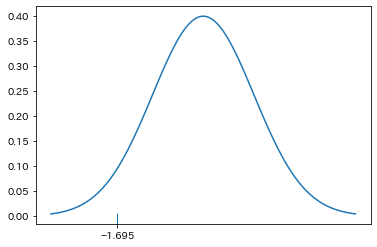

In [20]:
x = np.linspace(-3, 3, 100)
null_dist = stats.norm()
plt.plot(x, null_dist.pdf(x))
sns.rugplot([z])
plt.xticks([z])
plt.show()

###### 練習問題

上で求めた検定統計量 $z$ に対応した $p$ 値を求める。

In [21]:
p = null_dist.sf(np.abs(z)) * 2
p

0.09007096940440563

## Pythonでの対応のない2群の比率の差の検定の実行方法
---
`statsmodels.stats.proportion.proportions_ztest`を使用する。

In [22]:
proportions_ztest??

In [23]:
proportions_ztest([tokyo.sum(), osaka.sum()], [tokyo.count(), osaka.count()])

(-1.6950234656435301, 0.09007096940440563)